   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

C:\Users\HomePC\AppData\Local\Temp\ipykernel_11808\1360502718.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')


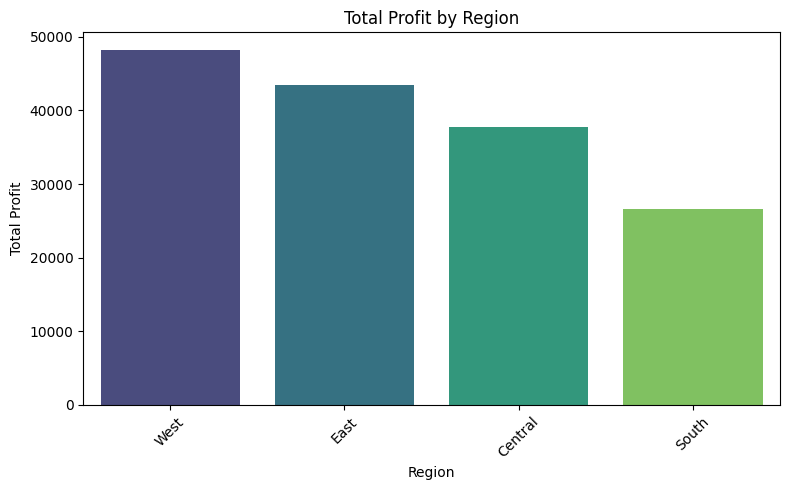


Sales and Profit by Category:
                        Sales    Profit
Category                              
Furniture        280442.7726  39233.90
Office Supplies  252956.1610  44773.42
Technology       332344.3100  72085.54


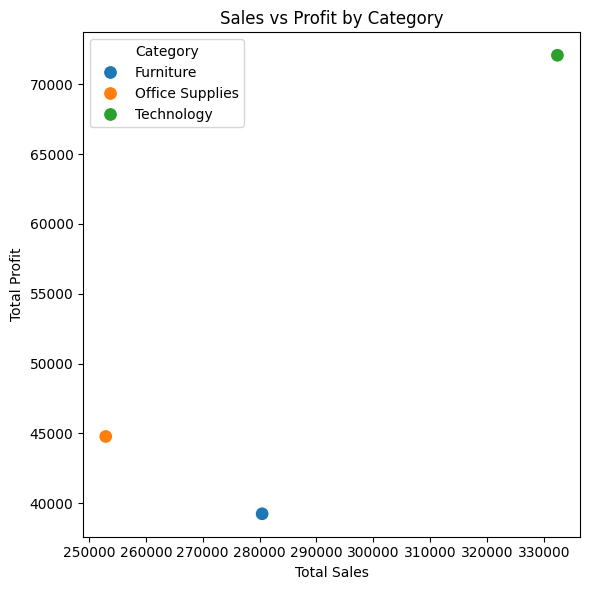

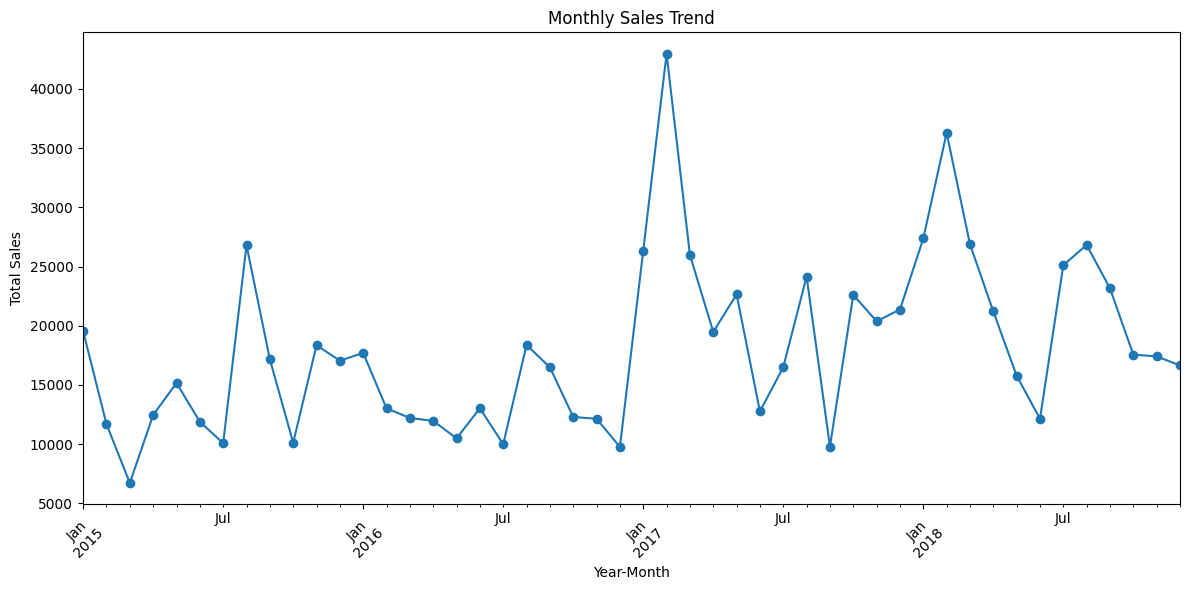

In [4]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np  

# load data
df = pd.read_csv('train.csv')

# Previewing the data
print(df.head())
print("\nDataset info:\n")
print(df.info())

# Checking for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Data Cleaning
# Drop unnecessary columns if any
df = df.drop_duplicates()   

# Handle missing values (if any)
df = df.dropna()  

# ensure correct data types
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'] , errors='coerce')

#remove rows with invalid dates
df = df.dropna(subset=['Order Date'])


# create new columns for analysis
if "Sales" in df.columns and "Profit" in df.columns:
    df['Profit Margin'] = df['Profit'] / df['Sales']

# Analysis Questions

# 1 Which region is most Profitable?
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print("\nTotal Profit by Region:\n", region_profit)

# visualization
plt.figure(figsize=(8,5))
sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2 Which product category drive sales but not profit?
category_sales_profit = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})
print("\nSales and Profit by Category:\n", category_sales_profit)

plt.figure(figsize=(6,6))
sns.scatterplot(data=category_sales_profit, x='Sales', y='Profit', hue=category_sales_profit.index, s=100)
plt.title('Sales vs Profit by Category')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


# 3 Seasonal trends in sales
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

output_file = 'cleaned_superstore'
df.to_csv(output_file + '.csv', index=False, encoding='utf-8-sig')